In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("parquet/run1008_srppac.parquet")
df.show(5)
print(df.filter("charge2_x > 0 AND charge2_y > 0 AND ABS(id0_x - id1_x) = 1 AND ABS(id0_y - id1_y) = 1 AND ABS(id0_x - id2_x) = 1 AND ABS(id0_y - id2_y) = 1").count())

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/15 04:08:28 WARN Utils: Your hostname, gpuana02, resolves to a loopback address: 127.0.1.1; using 192.168.1.216 instead (on interface enp4s0)
26/01/15 04:08:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
26/01/15 04:08:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/15 04:08:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
26/01/15 04:08:29 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


+---------+--------------------+--------------------+--------------------+------+-------------------+-----------------+------------------+------------------+-----+-----+-----+-------------------+--------------------+--------------------+--------------------+------+-------------------+-----------------+------------------+------------------+-----+-----+-----+--------------------+-------+
|hbfNumber|                id_x|            timing_x|            charge_x|size_x|          timing0_x|        charge0_x|         charge1_x|         charge2_x|id0_x|id1_x|id2_x|             q0q1_x|                id_y|            timing_y|            charge_y|size_y|          timing0_y|        charge0_y|         charge1_y|         charge2_y|id0_y|id1_y|id2_y|              q0q1_y|runname|
+---------+--------------------+--------------------+--------------------+------+-------------------+-----------------+------------------+------------------+-----+-----+-----+-------------------+--------------------+------

Statistics:
[[0.00000e+00 1.50000e+01 0.00000e+00]
 [0.00000e+00 1.46587e+05 2.00000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00]]
Statistics:
[[0.00000e+00 2.40000e+01 0.00000e+00]
 [0.00000e+00 1.47005e+05 1.10000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00]]


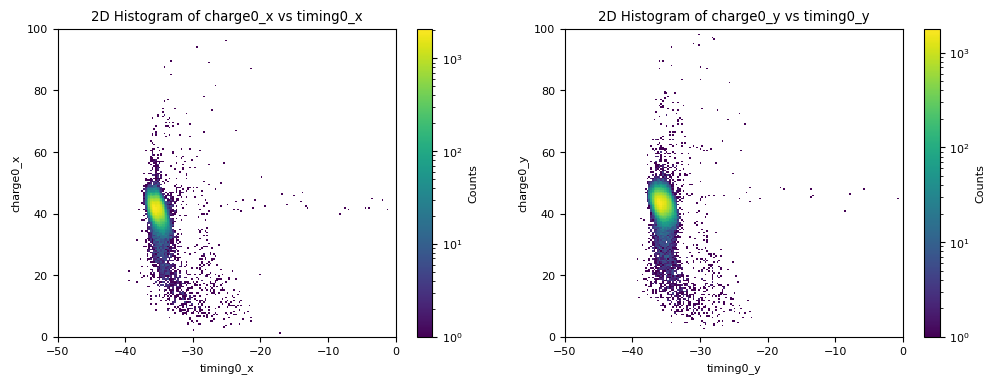

In [2]:
from hist.sparkHist2d import Hist2DArrays
from hist.sparkHist2d import Hist2D
from hist.sparkHist1d import Hist1D
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(0, figsize=(12,4))
plt.rcParams["font.size"] = 8
plt.subplot2grid((1,2),(0,0))
h = Hist2D(df, ["timing0_x","charge0_x"], [200,200], [[-50, 0], [0, 100]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((1,2),(0,1))
h = Hist2D(df, ["timing0_y","charge0_y"], [200,200], [[-50, 0], [0, 100]], norm=LogNorm(), interpolation='none')
plt.show()  

Total entries: 146622, Underflow: 0, Inside: 146449, Overflow: 173
Total entries: 147040, Underflow: 0, Inside: 146831, Overflow: 209


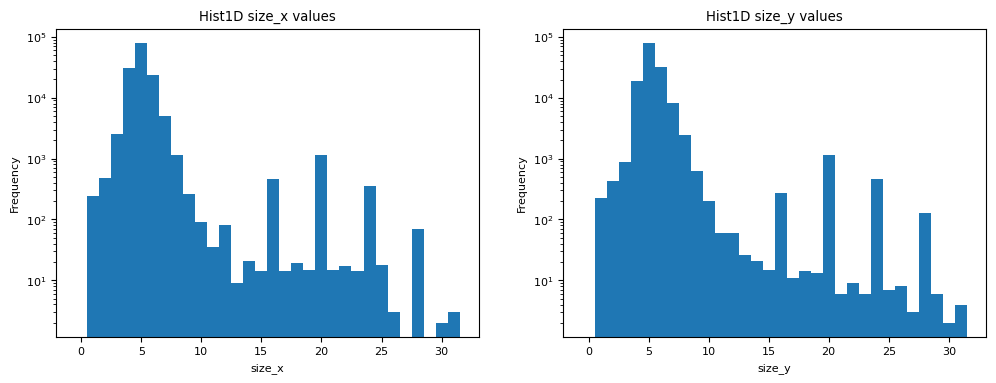

In [3]:
plt.figure(0, figsize=(12,4))
plt.rcParams["font.size"] = 8
plt.subplot2grid((1,2),(0,0))
h = Hist1D(df, "size_x", 33, [-0.5, 31.5])
plt.yscale('log')
plt.subplot2grid((1,2),(0,1))
h = Hist1D(df, "size_y", 33, [-0.5, 31.5])
plt.yscale('log')
plt.show()

Statistics:
[[     0.      0.      0.]
 [     0. 137643.      0.]
 [     0.      0.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 132916.      0.]
 [     0.      0.      0.]]


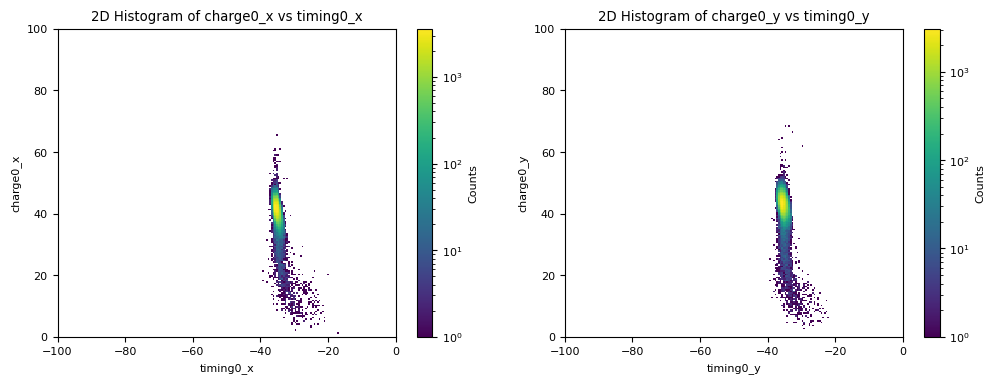

In [4]:
plt.figure(0, figsize=(12,4))
plt.rcParams["font.size"] = 8
plt.subplot2grid((1,2),(0,0))
h = Hist2D(df.filter("size_x<7"), ["timing0_x","charge0_x"], [200,200], [[-100, 0], [0, 100]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((1,2),(0,1))
h = Hist2D(df.filter("size_y<7"), ["timing0_y","charge0_y"], [200,200], [[-100, 0], [0, 100]], norm=LogNorm(), interpolation='none')
plt.show() 

Statistics:
[[     0.      0.      0.]
 [     0. 126524.      0.]
 [     0.      0.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 126340.      0.]
 [     0.      0.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 125915.      0.]
 [     0.      0.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 126524.      0.]
 [     0.      0.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 126423.      0.]
 [     0.      0.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 126133.      0.]
 [     0.      0.      0.]]


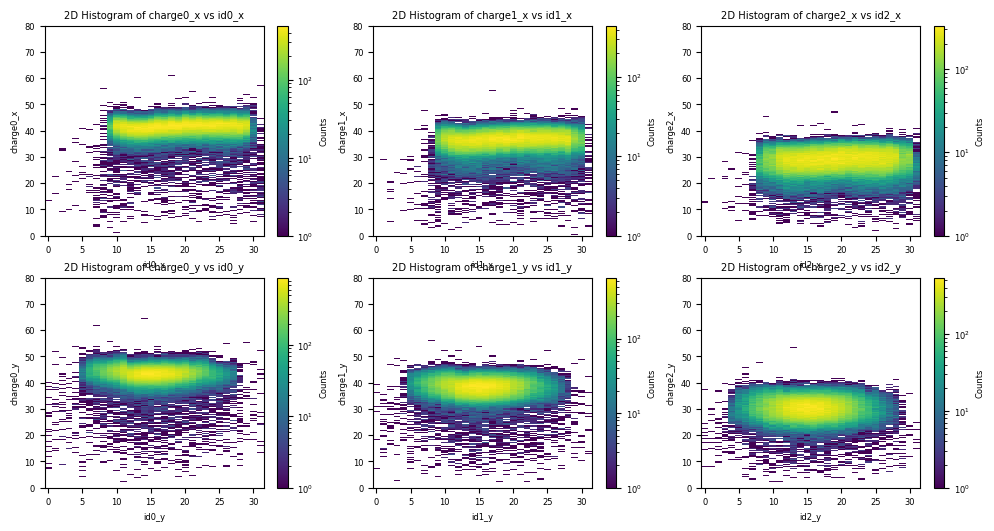

In [5]:
df_f = df.filter("size_x<7").filter("size_y<7")
plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 6
plt.subplot2grid((2,3),(0,0))
h = Hist2D(df_f, ["id0_x","charge0_x"], [33,200], [[-0.5, 31.5], [0, 80]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(0,1))
h = Hist2D(df_f, ["id1_x","charge1_x"], [33,200], [[-0.5, 31.5], [0, 80]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(0,2))
h = Hist2D(df_f, ["id2_x","charge2_x"], [33,200], [[-0.5, 31.5], [0, 80]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(1,0))
h = Hist2D(df_f, ["id0_y","charge0_y"], [33,200], [[-0.5, 31.5], [0, 80]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(1,1))
h = Hist2D(df_f, ["id1_y","charge1_y"], [33,200], [[-0.5, 31.5], [0, 80]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(1,2))
h = Hist2D(df_f, ["id2_y","charge2_y"], [33,200], [[-0.5, 31.5], [0, 80]], norm=LogNorm(), interpolation='none')
plt.show() 

Statistics:
[[     0.      0.      0.]
 [     0. 126524.      0.]
 [     0.      0.      0.]]


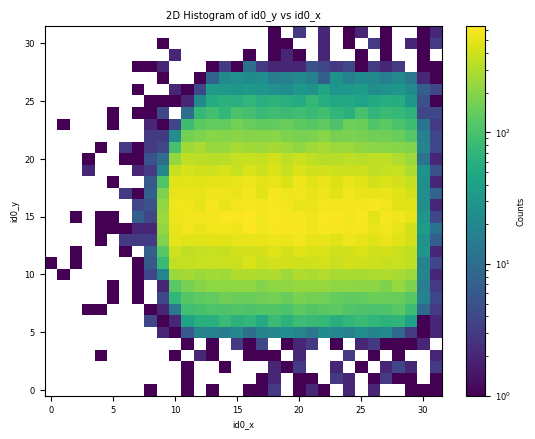

Statistics:
[[     0.      0.      0.]
 [     0. 126289.      0.]
 [     0.      0.      0.]]


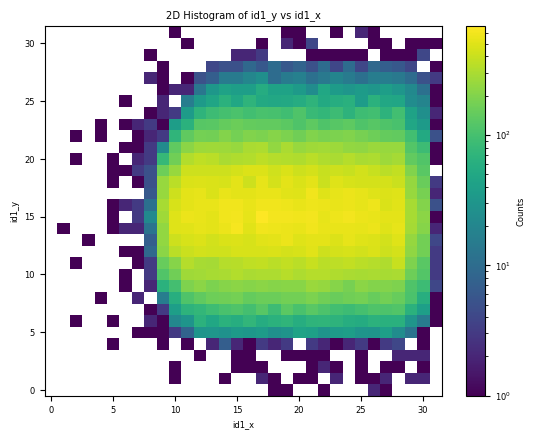

In [8]:
h = Hist2D(df_f, ["id0_x","id0_y"], [33,33], [[-0.5, 31.5], [-0.5,31.5]], norm=LogNorm(), interpolation='none')
plt.show()
h = Hist2D(df_f, ["id1_x","id1_y"], [33,33], [[-0.5, 31.5], [-0.5,31.5]], norm=LogNorm(), interpolation='none')

Statistics:
[[     0.      0.      0.]
 [     0. 126524.      0.]
 [     0.      0.      0.]]


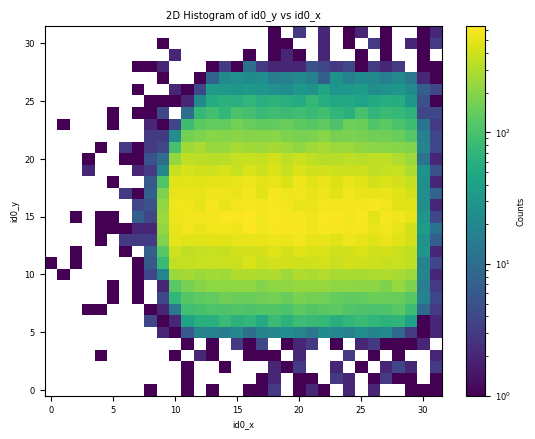

Statistics:
[[     0.      0.      0.]
 [     0. 126289.      0.]
 [     0.      0.      0.]]


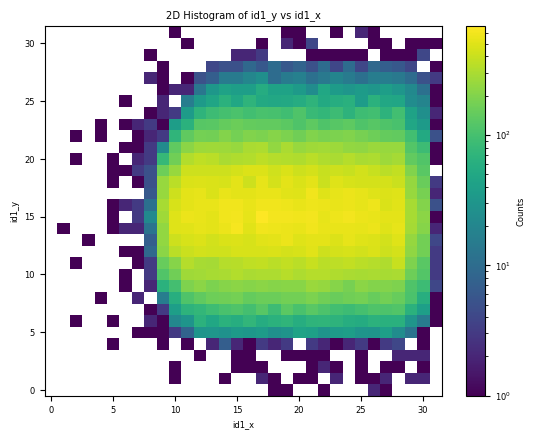

In [ ]:
h = Hist2D(df_f, ["id0_x","id0_y"], [33,33], [[-0.5, 31.5], [-0.5,31.5]], norm=LogNorm(), interpolation='none')
plt.show()
h = Hist2D(df_f, ["id1_x","id1_y"], [33,33], [[-0.5, 31.5], [-0.5,31.5]], norm=LogNorm(), interpolation='none')